In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile as zf
import imutils
import cv2
import dlib
import random
import tensorflow as tf

from keras.layers import Dense,Conv2D,MaxPool2D,AveragePooling2D,Flatten,Dropout,Activation
from keras.models import Sequential
from keras.optimizers import SGD,Adam,RMSprop
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.utils import np_utils
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

from imutils import build_montages
from google.colab.patches import cv2_imshow

sns.set()

In [0]:
filepath_prototxt = '/content/deploy.prototxt.txt'
filepath_model = '/content/res10_300x300_ssd_iter_140000.caffemodel'

In [250]:
os.getcwd()

'/content'

In [0]:
handle_test=zf.ZipFile(r'/content/test.zip')
handle_test.extractall('/content/Testing')
handle_test.close()


handle_train=zf.ZipFile(r'/content/train.zip')
handle_train.extractall('/content/Training')
handle_train.close()



In [0]:
train_mask = os.listdir('/content/Training/train/train_with_mask/')
train_nomask = os.listdir('/content/Training/train/train_without_mask/')

test_mask = os.listdir('/content/Testing/test/test_with_mask/')
test_nomask = os.listdir('/content/Testing/test/test_without_mask/')


In [0]:
filepath_train_mask = '/content/Training/train/train_with_mask/'
filepath_train_nomask = '/content/Training/train/train_without_mask/'

filepath_test_mask = '/content/Testing/test/test_with_mask/'
filepath_test_nomask = '/content/Testing/test/test_without_mask/'


In [0]:
train_images = []
test_images = []
outputs = []

labels=[]
test_labels=[]

for i in train_mask:
  image = cv2.imread(filepath_train_mask+i)
  image = cv2.resize(image , (64,64))
  train_images.append(image)
  labels.append(1)

for i in train_nomask:
  image = cv2.imread(filepath_train_nomask+i)
  image = cv2.resize(image , (64,64))
  train_images.append(image)
  labels.append(0)

for i in test_mask:
  image = cv2.imread(filepath_test_mask+i)
  outputs.append(image)
  image = cv2.resize(image , (64,64))
  test_images.append(image)
  test_labels.append(1)

for i in test_nomask:
  image = cv2.imread(filepath_test_nomask+i)
  outputs.append(image)
  image = cv2.resize(image , (64,64))
  test_images.append(image)
  test_labels.append(0)



In [255]:
train_images[0].shape

(64, 64, 3)

In [256]:
test_images[0].shape

(64, 64, 3)

In [0]:
train_images = np.array(train_images , dtype="float") / 255.0
test_images = np.array(test_images , dtype="float") / 255.0
labels = np.array(labels)

In [258]:
train_images.shape

(1250, 64, 64, 3)

In [259]:
test_images.shape

(194, 64, 64, 3)

In [0]:
(trainX , testX , trainY , testY) = train_test_split(train_images , labels, train_size=0.80 , test_size=0.20 , random_state=42) 

In [261]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(1000, 64, 64, 3)
<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>
(250, 64, 64, 3)
<class 'numpy.ndarray'>
(250,)


In [262]:
trainY

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [0]:
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [264]:
trainY
# 1 0 is nomask
# 0 1 is mask

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = "same", activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(2,activation="softmax"))

In [266]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)       

In [0]:
INIT_LR = 1e-2
EPOCHS = 40
BS = 32

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=opt , metrics=["accuracy"])

In [269]:
H = model.fit(trainX,trainY , epochs=EPOCHS, batch_size=BS , validation_data=(testX,testY))

Train on 1000 samples, validate on 250 samples
Epoch 1/40
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6250 - accuracy: 0.8680 - val_loss: 6.3027 - val_accuracy: 0.5800
Epoch 2/40
1000/1000 [==============================] - 1s 731us/step - loss: 0.1671 - accuracy: 0.9590 - val_loss: 6.8932 - val_accuracy: 0.5440
Epoch 3/40
1000/1000 [==============================] - 1s 744us/step - loss: 0.1674 - accuracy: 0.9530 - val_loss: 0.3667 - val_accuracy: 0.9200
Epoch 4/40
1000/1000 [==============================] - 1s 734us/step - loss: 0.0525 - accuracy: 0.9850 - val_loss: 8.1495 - val_accuracy: 0.4640
Epoch 5/40
1000/1000 [==============================] - 1s 734us/step - loss: 0.0718 - accuracy: 0.9860 - val_loss: 0.2803 - val_accuracy: 0.9440
Epoch 6/40
1000/1000 [==============================] - 1s 728us/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.1712 - val_accuracy: 0.9600
Epoch 7/40
1000/1000 [==============================] - 1s 738us/step - loss: 0

In [270]:
predictions = model.predict(testX)
predictions

array([[1.00000000e+00, 1.11588616e-09],
       [1.00000000e+00, 2.20866152e-08],
       [1.31213901e-10, 1.00000000e+00],
       [1.00000000e+00, 6.58973640e-11],
       [6.92588671e-08, 9.99999881e-01],
       [9.99980927e-01, 1.91144773e-05],
       [1.00000000e+00, 1.61547983e-10],
       [1.22325960e-11, 1.00000000e+00],
       [7.94232562e-12, 1.00000000e+00],
       [3.34221317e-10, 1.00000000e+00],
       [1.00000000e+00, 3.45884432e-11],
       [9.99996066e-01, 3.98998236e-06],
       [1.67387812e-10, 1.00000000e+00],
       [5.64596148e-10, 1.00000000e+00],
       [1.00000000e+00, 2.34023721e-11],
       [9.99998927e-01, 1.08739687e-06],
       [1.00000000e+00, 3.25951781e-08],
       [9.99999762e-01, 2.66306017e-07],
       [1.00000000e+00, 1.35223850e-08],
       [1.00000000e+00, 1.65916578e-08],
       [1.00000000e+00, 7.65783595e-13],
       [1.00000000e+00, 1.76615593e-08],
       [1.00000000e+00, 4.48571518e-12],
       [9.99998093e-01, 1.91881259e-06],
       [3.181449

In [271]:
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=["NoMask","Mask"]))

              precision    recall  f1-score   support

      NoMask       0.97      1.00      0.98       116
        Mask       1.00      0.97      0.98       134

    accuracy                           0.98       250
   macro avg       0.98      0.99      0.98       250
weighted avg       0.98      0.98      0.98       250



In [272]:
cnf = confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
cnf

array([[116,   0],
       [  4, 130]])

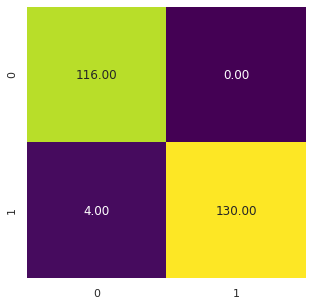

In [273]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf, annot=True, cmap="viridis", cbar=False, fmt=".2f")
plt.show()

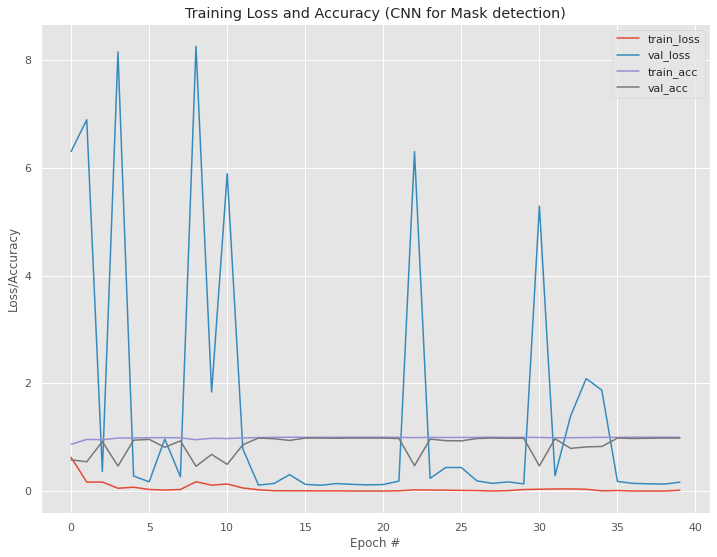

In [274]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(12,9))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (CNN for Mask detection)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [275]:
preds = model.predict(test_images)
preds

array([[5.44352385e-09, 1.00000000e+00],
       [4.13757443e-05, 9.99958634e-01],
       [1.27077824e-08, 1.00000000e+00],
       [7.36919380e-12, 1.00000000e+00],
       [5.32769098e-12, 1.00000000e+00],
       [9.95110452e-01, 4.88954969e-03],
       [9.90818307e-07, 9.99999046e-01],
       [3.02970366e-12, 1.00000000e+00],
       [4.61369033e-11, 1.00000000e+00],
       [1.36450113e-08, 1.00000000e+00],
       [1.42206580e-10, 1.00000000e+00],
       [8.71421967e-13, 1.00000000e+00],
       [1.77864123e-07, 9.99999881e-01],
       [1.12975285e-09, 1.00000000e+00],
       [5.97063857e-11, 1.00000000e+00],
       [2.37431963e-09, 1.00000000e+00],
       [2.46202444e-06, 9.99997497e-01],
       [5.52881105e-14, 1.00000000e+00],
       [2.80303758e-09, 1.00000000e+00],
       [4.52307525e-10, 1.00000000e+00],
       [6.38573396e-12, 1.00000000e+00],
       [1.20340554e-12, 1.00000000e+00],
       [2.87225267e-13, 1.00000000e+00],
       [1.04419064e-06, 9.99998927e-01],
       [7.044654

In [0]:
#useful indexes -> 93,106,9,89,123,151,53,84
# check index -> 85 , 54 ,53

In [363]:
index = np.random.randint(0,100)
index

70

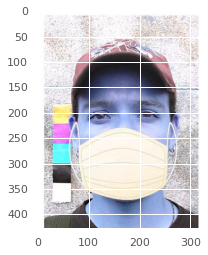

In [364]:
plt.imshow(outputs[index])

In [365]:
i = preds.argmax(axis=1)[index]
i

1

In [366]:
vals = np.amax(preds, axis=1)
val = vals[index]
val

1.0

In [367]:
val = val*100
val = val.round(2)
val

100.0

In [0]:
net = cv2.dnn.readNetFromCaffe(filepath_prototxt , filepath_model)

In [369]:
outputs[index].shape

(428, 320, 3)

In [0]:
image = outputs[index]
(h,w) = image.shape[:2]

blob = cv2.dnn.blobFromImage(cv2.resize(image,(300,300)), 1.0 ,(300,300) ,(104.0, 177.0, 123.0) )

In [0]:
net.setInput(blob)
detections = net.forward()

In [372]:
detections.shape

(1, 1, 200, 7)

In [0]:
conf = 0.70
no_conf = 1.99

In [0]:
if i == 1:
  result="Mask"
else:
  result="NoMask"

In [0]:
if i == 1:
  color=(0,255,0)
else:
  color=(0,0,255)

In [376]:
result

'Mask'

In [0]:
counter = 0

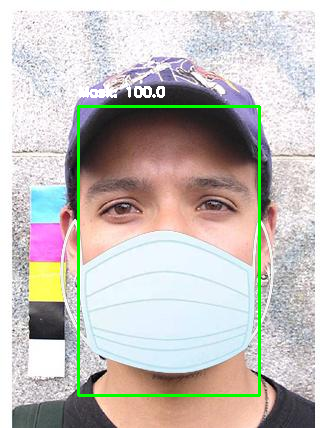

-1

In [378]:

for i in range(0 ,detections.shape[2]):

  confidence = detections[0,0,i,2]

  if ( (confidence > conf) and (confidence < no_conf) and counter == 0):
    box = detections[0,0,i,3:7]* np.array([w,h,w,h])
    (startX , startY , endX, endY) = box.astype("int")

    text = str(result)+": "+str(val)

    y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.rectangle(image , (startX , startY) , (endX,endY) , color , 2)

    cv2.putText(image , text , (startX , y) , cv2.FONT_HERSHEY_SIMPLEX , 0.45 , (255,255,255), 2 )

    counter = counter+1

cv2_imshow(image)
cv2.waitKey(0)

In [0]:
#model.save('mask_detection.model')

In [0]:
#from google.colab import files
#files.download('mask_detection.model')

In [0]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")

In [0]:

from google.colab import files
files.download("model.h5")

In [0]:
from google.colab import files
files.download("model.json")